In [1]:
import sys

sys.path.append("/home/ptbadia/code/tfg/tfg_ttcross")

In [2]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
from tt_cross.src.regular_tt_cross.dmrg_cross import *
from tt_cross.src.quantic_tt_cross.interpolators_1D import *

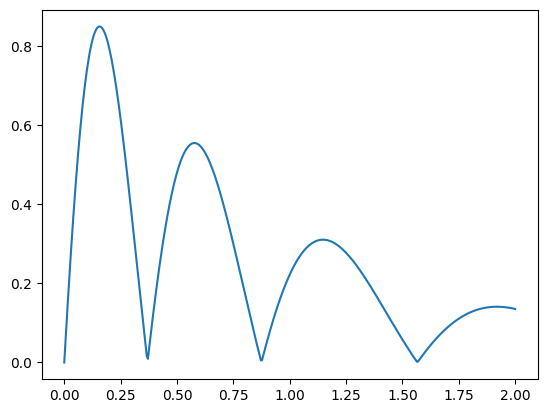

In [3]:
interval = [0, 2]
d = 24


def test_func(x):
    return np.abs(np.sin(10 * np.log(x + 1)) * np.exp(-x))


x = np.linspace(interval[0], interval[1], 400)

y = [test_func(x) for x in x]

plt.plot(x, y)

In [4]:
g_interpolator = greedy_one_dim_func_interpolator(
    func=test_func,
    interval=interval,
    d=d,
    complex_function=False,
    pivot_initialization="random",
)

g_interpolator.interpolate(8, 1e-8, 4)

Function not compiled with numba. Using non-compiled version.
Initialization succesfully done after time: 0.0021066665649414062 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Sweep 4


In [5]:
g_interpolator2 = greedy_one_dim_func_interpolator(
    func=test_func,
    interval=interval,
    d=d,
    complex_function=False,
    pivot_initialization="random",
)

g_interpolator2.interpolate(6, 1e-8, 4)

Function not compiled with numba. Using non-compiled version.
Initialization succesfully done after time: 0.0035562515258789062 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Sweep 4


In [6]:
g_interpolator3 = greedy_one_dim_func_interpolator(
    func=test_func,
    interval=interval,
    d=d,
    complex_function=False,
    pivot_initialization="random",
)

g_interpolator3.interpolate(4, 1e-8, 4)

Function not compiled with numba. Using non-compiled version.
Initialization succesfully done after time: 0.0027163028717041016 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3


In [7]:
g_interpolator4 = greedy_one_dim_func_interpolator(
    func=test_func,
    interval=interval,
    d=d,
    complex_function=False,
    pivot_initialization="random",
)

g_interpolator4.interpolate(2, 1e-8, 4)

Function not compiled with numba. Using non-compiled version.
Initialization succesfully done after time: 0.002408742904663086 seconds and 1 tries.
Sweep 1
Sweep 2


In [8]:
t_interpolator = ttrc_one_dim_func_interpolator(
    func=test_func, interval=interval, d=d, complex_function=False, pivot_initialization="random"
)

t_interpolator.interpolate(
    initial_bond_guess=1,
    max_bond=8,
    maxvol_tol=1e-8,
    truncation_tol=1e-10,
    sweeps=4,
)

Function not compiled with numba. Using non-compiled version.
Initialization done after time: 0.0016791820526123047 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Sweep 4


In [9]:
t_interpolator2 = ttrc_one_dim_func_interpolator(
    func=test_func, interval=interval, d=d, complex_function=False, pivot_initialization="random"
)

t_interpolator2.interpolate(
    initial_bond_guess=1,
    max_bond=6,
    maxvol_tol=1e-8,
    truncation_tol=1e-10,
    sweeps=4,
)

Function not compiled with numba. Using non-compiled version.
Initialization done after time: 0.005444526672363281 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Sweep 4


In [10]:
t_interpolator3 = ttrc_one_dim_func_interpolator(
    func=test_func, interval=interval, d=d, complex_function=False, pivot_initialization="random"
)

t_interpolator3.interpolate(
    initial_bond_guess=1,
    max_bond=4,
    maxvol_tol=1e-8,
    truncation_tol=1e-10,
    sweeps=4,
)

Function not compiled with numba. Using non-compiled version.
Initialization done after time: 0.004273414611816406 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Sweep 4


In [11]:
t_interpolator4 = ttrc_one_dim_func_interpolator(
    func=test_func, interval=interval, d=d, complex_function=False, pivot_initialization="random"
)

t_interpolator4.interpolate(
    initial_bond_guess=1,
    max_bond=2,
    maxvol_tol=1e-8,
    truncation_tol=1e-10,
    sweeps=4,
)

Function not compiled with numba. Using non-compiled version.
Initialization done after time: 0.009668350219726562 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Sweep 4


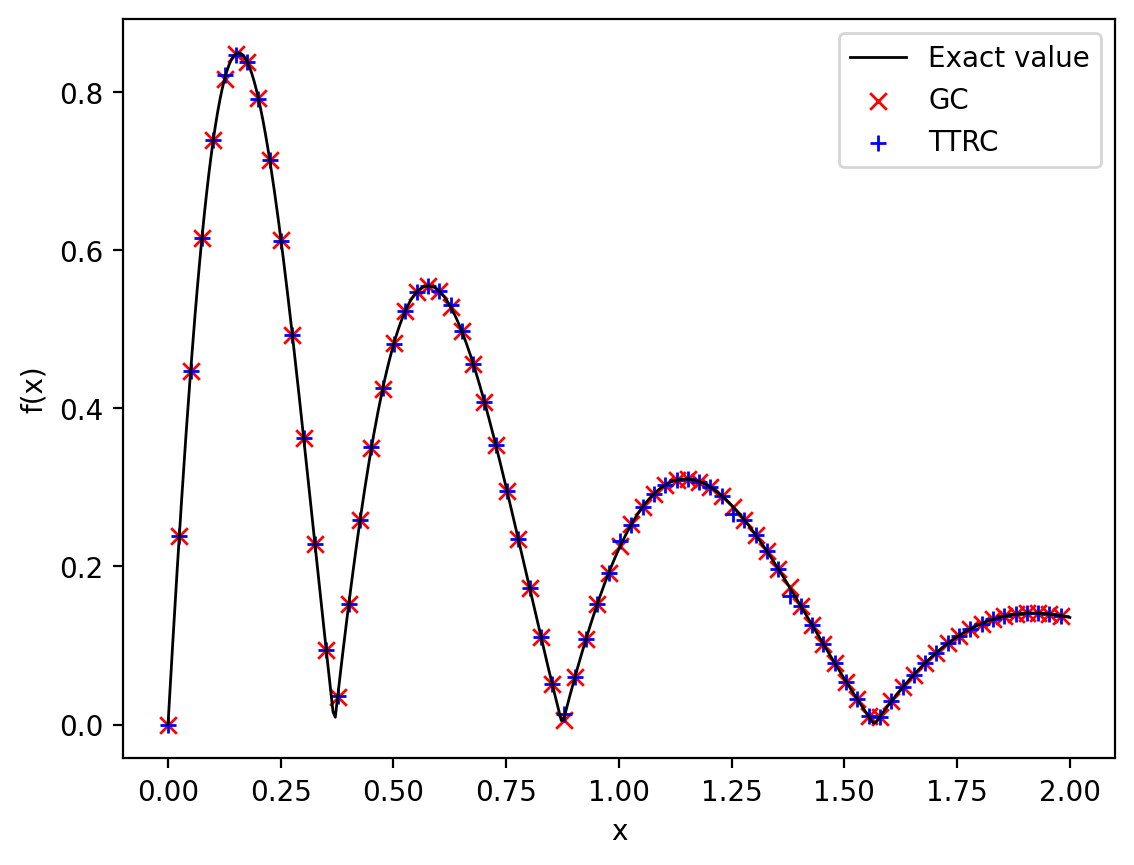

In [12]:
import matplotlib.pyplot as plt

interpolation1 = np.array([g_interpolator.eval(x_i) for x_i in x])
interpolation2 = np.array([t_interpolator.eval(x_i) for x_i in x])
plt.figure(dpi=200)
plt.plot(x, y, label="Exact value", c="k", linewidth=1)
plt.scatter(x[::5], interpolation1[::5], label="GC", marker="x", c="r", linewidths=1)
plt.scatter(x[::5], interpolation2[::5], label="TTRC", marker="+", c="b", linewidths=1)

plt.xlabel("x")
plt.ylabel("f(x)")
# plt.title("Inteprolation of of $f(x) = \cos(x / 2^{-30})\cos(x / (4\sqrt{5}2^{-30}))e^{-x^2} + 2e^{-x}$")
plt.legend()
plt.savefig("last_figure1.png")

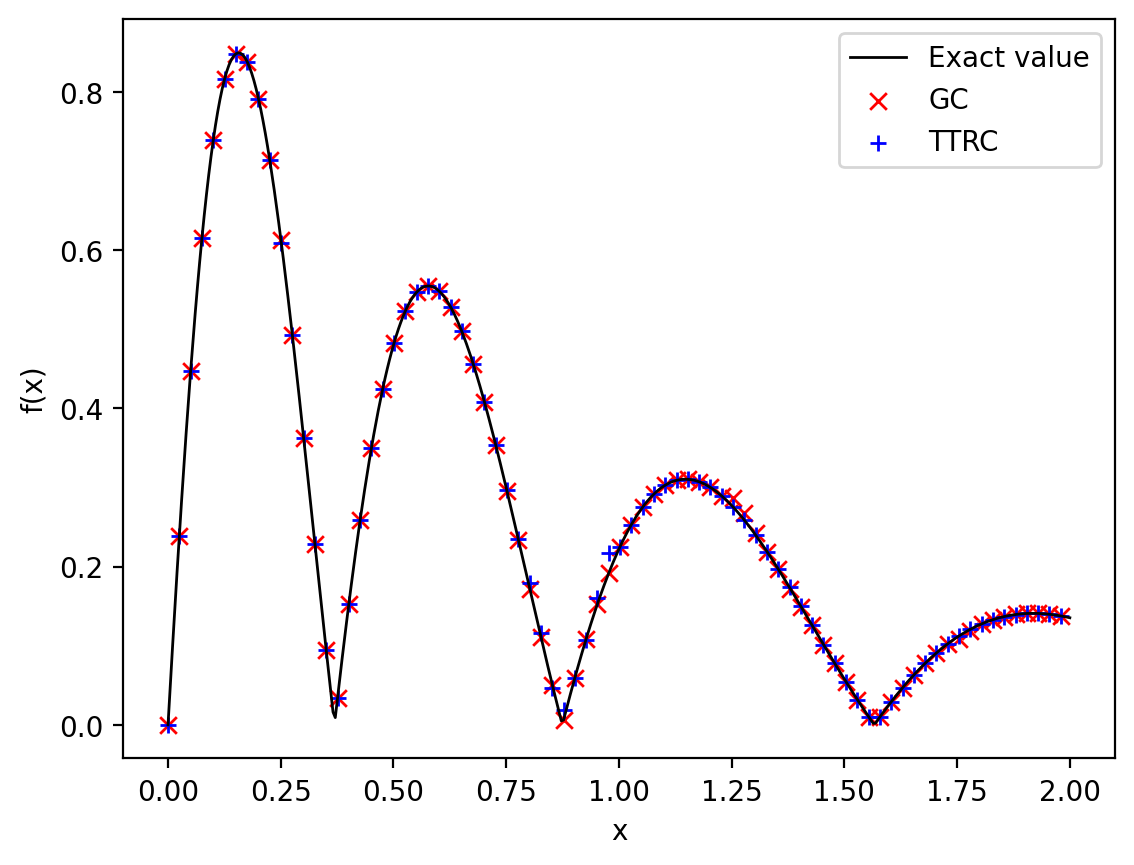

In [13]:
import matplotlib.pyplot as plt

interpolation3 = np.array([g_interpolator2.eval(x_i) for x_i in x])
interpolation4 = np.array([t_interpolator2.eval(x_i) for x_i in x])
plt.figure(dpi=200)
plt.plot(x, y, label="Exact value", c="k", linewidth=1)
plt.scatter(x[::5], interpolation3[::5], label="GC", marker="x", c="r", linewidths=1)
plt.scatter(x[::5], interpolation4[::5], label="TTRC", marker="+", c="b", linewidths=1)

plt.xlabel("x")
plt.ylabel("f(x)")
# plt.title("Inteprolation of of $f(x) = \cos(x / 2^{-30})\cos(x / (4\sqrt{5}2^{-30}))e^{-x^2} + 2e^{-x}$")
plt.legend()
plt.savefig("last_figure1.png")

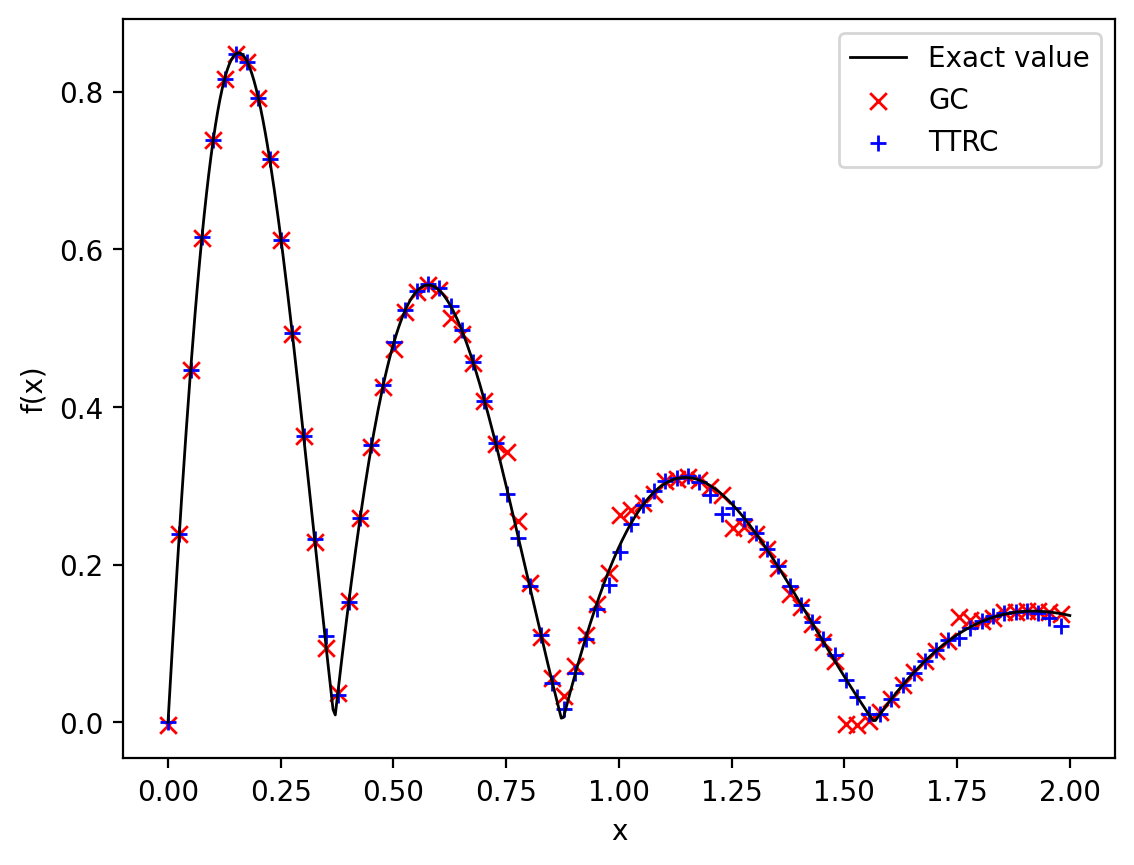

In [14]:
import matplotlib.pyplot as plt

interpolation5 = np.array([g_interpolator3.eval(x_i) for x_i in x])
interpolation6 = np.array([t_interpolator3.eval(x_i) for x_i in x])
plt.figure(dpi=200)
plt.plot(x, y, label="Exact value", c="k", linewidth=1)
plt.scatter(x[::5], interpolation5[::5], label="GC", marker="x", c="r", linewidths=1)
plt.scatter(x[::5], interpolation6[::5], label="TTRC", marker="+", c="b", linewidths=1)

plt.xlabel("x")
plt.ylabel("f(x)")
# plt.title("Inteprolation of of $f(x) = \cos(x / 2^{-30})\cos(x / (4\sqrt{5}2^{-30}))e^{-x^2} + 2e^{-x}$")
plt.legend()
plt.savefig("last_figure1.png")

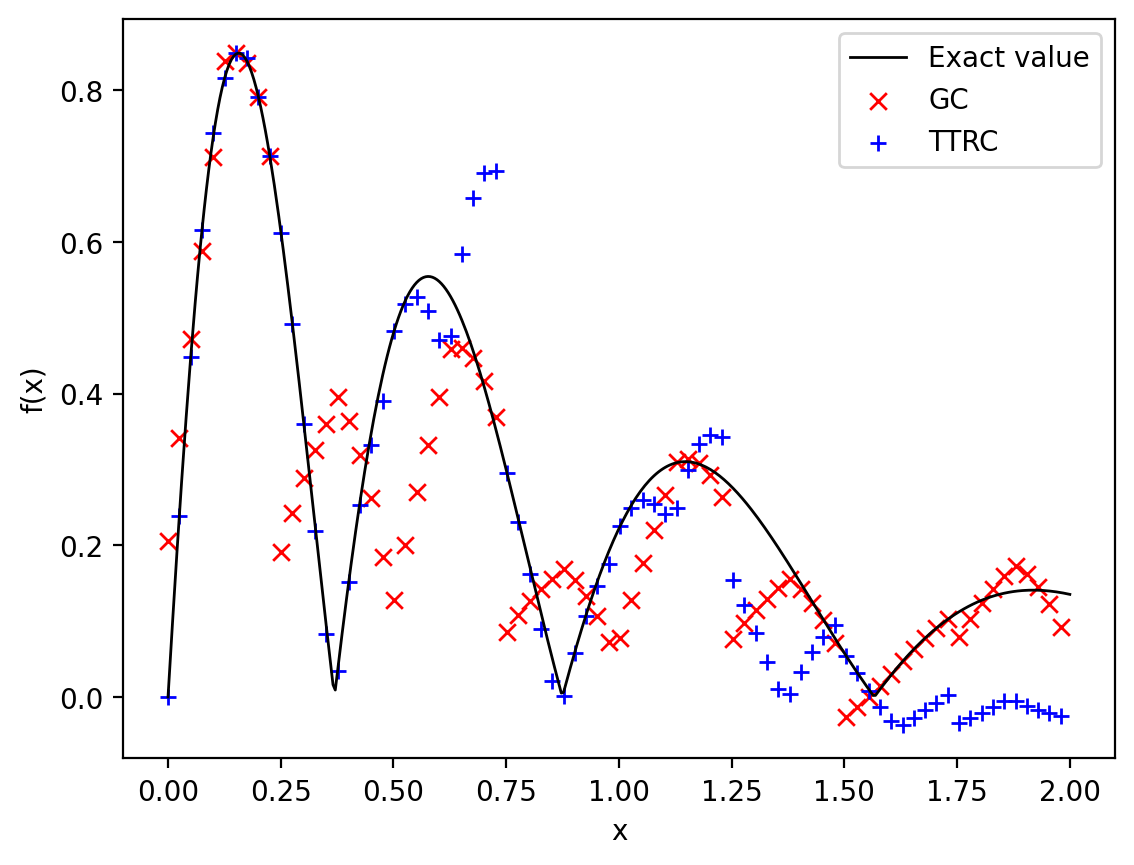

In [15]:
import matplotlib.pyplot as plt

interpolation7 = np.array([g_interpolator4.eval(x_i) for x_i in x])
interpolation8 = np.array([t_interpolator4.eval(x_i) for x_i in x])
plt.figure(dpi=200)
plt.plot(x, y, label="Exact value", c="k", linewidth=1)
plt.scatter(x[::5], interpolation7[::5], label="GC", marker="x", c="r", linewidths=1)
plt.scatter(x[::5], interpolation8[::5], label="TTRC", marker="+", c="b", linewidths=1)

plt.xlabel("x")
plt.ylabel("f(x)")
# plt.title("Inteprolation of of $f(x) = \cos(x / 2^{-30})\cos(x / (4\sqrt{5}2^{-30}))e^{-x^2} + 2e^{-x}$")
plt.legend()
plt.savefig("last_figure1.png")

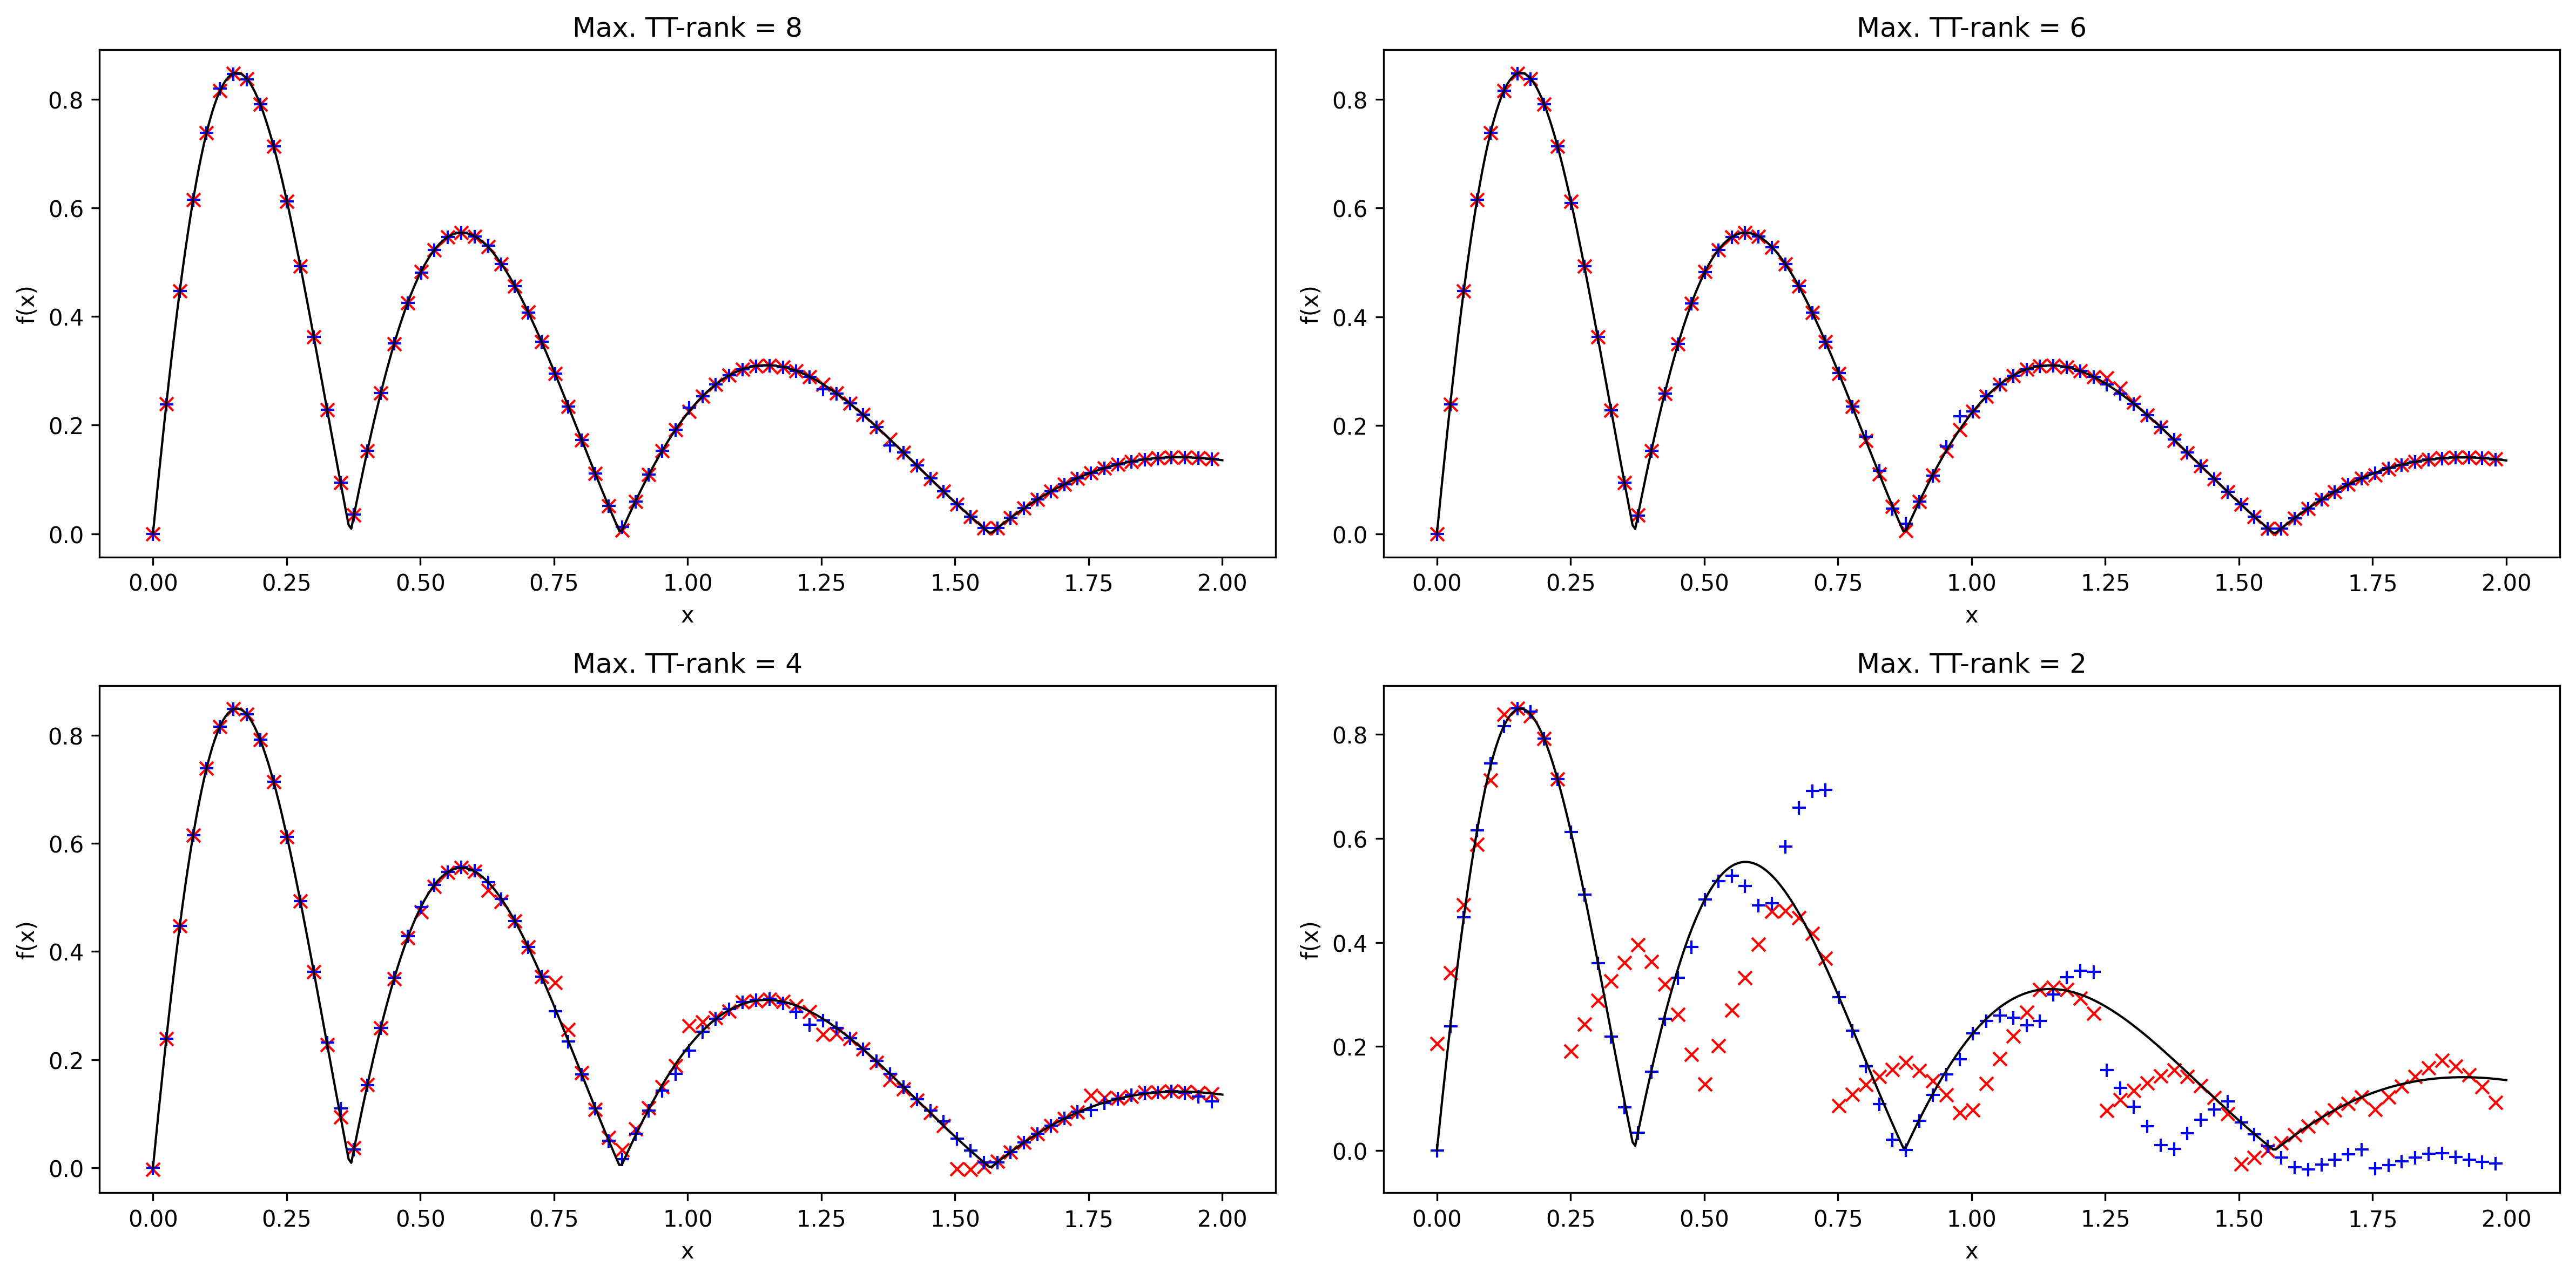

In [25]:
import numpy as np

import matplotlib.pyplot as plt

# Generate some random data

# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 8), dpi=300)

# Plot data on each subplot
axs[0, 0].scatter(x[::5], interpolation1[::5], label="GC", marker="x", c="r", linewidths=1)
axs[0, 0].scatter(x[::5], interpolation2[::5], label="TTRC", marker="+", c="b", linewidths=1)
axs[0, 0].plot(x, y, label="Exact value", c="k", linewidth=1)
axs[0, 0].set_title("Max. TT-rank = 8")
axs[0, 0].set_xlabel("x")
axs[0, 0].set_ylabel("f(x)")

axs[0, 1].scatter(x[::5], interpolation3[::5], label="GC", marker="x", c="r", linewidths=1)
axs[0, 1].scatter(x[::5], interpolation4[::5], label="TTRC", marker="+", c="b", linewidths=1)
axs[0, 1].plot(x, y, label="Exact value", c="k", linewidth=1)
axs[0, 1].set_title("Max. TT-rank = 6")
axs[0, 1].set_xlabel("x")
axs[0, 1].set_ylabel("f(x)")

axs[1, 0].scatter(x[::5], interpolation5[::5], label="GC", marker="x", c="r", linewidths=1)
axs[1, 0].scatter(x[::5], interpolation6[::5], label="TTRC", marker="+", c="b", linewidths=1)
axs[1, 0].plot(x, y, label="Exact value", c="k", linewidth=1)
axs[1, 0].set_title("Max. TT-rank = 4")
axs[1, 0].set_xlabel("x")
axs[1, 0].set_ylabel("f(x)")

axs[1, 1].scatter(x[::5], interpolation7[::5], label="GC", marker="x", c="r", linewidths=1)
axs[1, 1].scatter(x[::5], interpolation8[::5], label="TTRC", marker="+", c="b", linewidths=1)
axs[1, 1].plot(x, y, label="Exact value", c="k", linewidth=1)
axs[1, 1].set_title("Max. TT-rank = 2")
axs[1, 1].set_xlabel("x")
axs[1, 1].set_ylabel("f(x)")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.savefig("last_figure_multiplot.png")